<a href="https://colab.research.google.com/github/MassielC/pythonML_portfolio/blob/main/project02_frame_selection_for_fish_behavioral_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimized frame selection for fish behavioral analysis**  
🚀 **Efficiently selecting representative frames to analyze fish movement in long-duration behavioral studies**  

## **🔬 Project Overview**  
This project optimizes **frame selection** for analyzing fish **thermal preference** in a **temperature gradient tank**. Instead of manually counting fish positions every 8 hours or running YOLO on every frame (which is computationally expensive), we implement a **smart frame selection strategy** to extract the most representative frames per hour.  

## **❓ Why This Matters**  
🐟 Studying **behavioral fever in teleost fish** requires tracking how long fish stay in warmer regions over time.  
🎥 The dataset consists of **48-hour-long high-resolution videos (30 fps)**, making direct YOLO application inefficient.  
⚡ Random sampling may miss trends in fish movement, so a **clustering-based approach** ensures we capture dominant behavioral patterns efficiently.  


## **🛠️ Methodology**  
This pipeline **automatically selects the best frames per hour** using a **lightweight YOLO detection + clustering approach**:

1️⃣ **Temporal Downsampling**: Sample frames at a lower rate (1 frame every 5–10 sec) to reduce computational load.  
2️⃣ **Lightweight YOLO Detection**: Use a small YOLO model to detect fish positions in downsampled frames.  
3️⃣ **Position Clustering (DBSCAN)**: Cluster detected fish positions to find dominant spatial locations per hour.  
4️⃣ **Frame Selection**: Extract the frames closest to the centroids of the most frequent clusters (e.g., 2 per hour).  
5️⃣ **Optimized Fish Counting**: Selected frames are ready for YOLO-based region counting, significantly reducing processing time.  
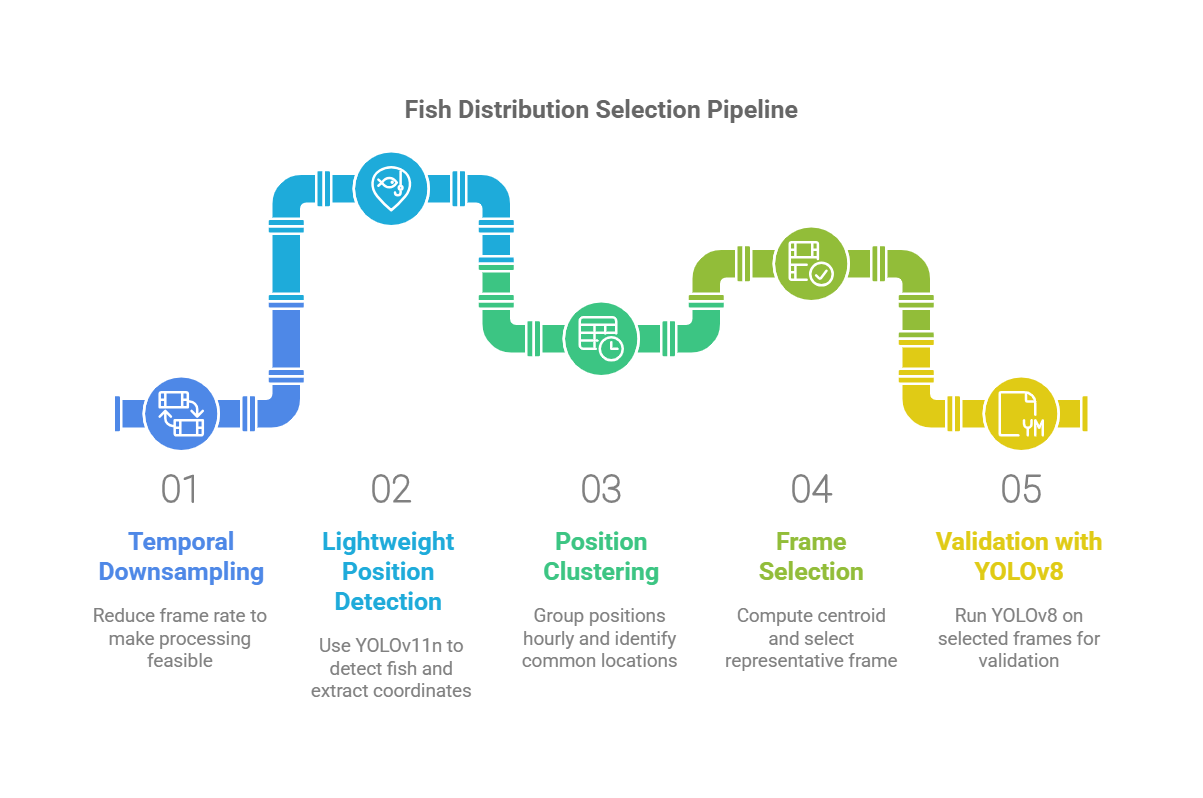

## **📂 Input Data**  
- **Custom YOLO dataset** for fish detection (user-trained model).  
- **Long-duration high-resolution video** (48h, 30fps).  

## **📤 Output**  
- **Key frames per hour** representing fish positions, ready for YOLO-based thermal zone counting.  

## **🛠️ Dependencies**  
Ensure you have the following libraries installed:  
```python
pandas
numpy
scikit-learn
opencv-python
ultralytics
random
```

## **📈 Example Implementation:**  

### **1. Temporal Downsampling**
- Done in HandBreak program.
- Input was 2000 x 2064 px video files

### **2. Lightweight YOLO Detection**
- For training YOLO model, random screenshots from previous videos were extrated usign the following code:

In [ ]:
!pip install opencv-python
import cv2
import random
import os

# Parameters
video_path = 'video.mp4'  # path to your video file
output_folder = 'screenshots'
num_screenshots = 40

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Open video file
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error opening video file.")
    exit()

# Get total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
if total_frames <= 0:
    print("Error: unable to get frame count.")
    cap.release()
    exit()

# Generate 20 unique random frame indices
random_frames = random.sample(range(total_frames), num_screenshots)

# Extract and save each random frame
for idx, frame_no in enumerate(random_frames):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
    ret, frame = cap.read()
    if ret:
        output_path = os.path.join(output_folder, f'screenshot_{idx+1}.jpg')
        cv2.imwrite(output_path, frame)
        print(f"Saved screenshot {idx+1} (frame {frame_no})")
    else:
        print(f"Warning: could not read frame {frame_no}")

cap.release()


Saved screenshot 1 (frame 176)
Saved screenshot 2 (frame 401)
Saved screenshot 3 (frame 181)
Saved screenshot 4 (frame 369)
Saved screenshot 5 (frame 448)
Saved screenshot 6 (frame 393)
Saved screenshot 7 (frame 121)
Saved screenshot 8 (frame 497)
Saved screenshot 9 (frame 583)
Saved screenshot 10 (frame 341)
Saved screenshot 11 (frame 530)
Saved screenshot 12 (frame 405)
Saved screenshot 13 (frame 424)
Saved screenshot 14 (frame 392)
Saved screenshot 15 (frame 53)
Saved screenshot 16 (frame 7)
Saved screenshot 17 (frame 178)
Saved screenshot 18 (frame 197)
Saved screenshot 19 (frame 70)
Saved screenshot 20 (frame 606)
Saved screenshot 21 (frame 131)
Saved screenshot 22 (frame 34)
Saved screenshot 23 (frame 492)
Saved screenshot 24 (frame 318)
Saved screenshot 25 (frame 299)
Saved screenshot 26 (frame 97)
Saved screenshot 27 (frame 285)
Saved screenshot 28 (frame 586)
Saved screenshot 29 (frame 414)
Saved screenshot 30 (frame 375)
Saved screenshot 31 (frame 556)
Saved screenshot 32 (fr

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


#### **YOLO Training:**

In [ ]:
!unzip -q fish.zip -d fish

In [ ]:
custom_data="custom_data.yaml"
!yolo train model=yolo11n.pt data=custom_data.yaml epochs=120 imgsz=640

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=custom_data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

In [ ]:
from ultralytics import YOLO
best="best.pt"
# Load your trained YOLOv8 model
model = YOLO(best)

# Run the detection and tracking on your video
control="test1.mp4"
results = model.track(source=control, save_txt=True, save=True,save_conf=True)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/953) /content/test1.mp4: 384x640 8 fishs, 15.4ms
video 1/1 (frame 2/953) /content/test1.mp4: 384x640 8 fishs, 19.7ms
video 1/1 (frame 3/953) /content/test1.mp4: 384x640 7 fishs, 13.4ms
video 1/1 (frame 4/953) /content/test1.mp4: 384x640 9 fishs, 12.9ms
video 1/1 (frame 5/953) /content/test1.mp4: 384x640 8 fishs, 12.7ms
video 1/1 (frame 6/953) /content/test1.mp4: 384x640 9 fishs, 12.7ms
video 1/1 (frame 7/953) /content/test1.mp4: 384x

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Directory where tracking results are saved
results_dir = 'runs/detect/track2/labels'
# List to store the positional data
data = []

# Regular expression to extract frame number
frame_re = re.compile(r'_([0-9]+)\.txt$')

# Iterate through the result files
for file in os.listdir(results_dir):
    if file.endswith('.txt'):
        match = frame_re.search(file)
        if match:
            frame_number = int(match.group(1))
            file_path = os.path.join(results_dir, file)
            with open(file_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) == 7:  # Adjust based on actual format
                        class_id, x_center, y_center, width, height, conf, track_id = map(float, parts)
                        data.append([frame_number, track_id, x_center, y_center, width, height, conf])

# Create a DataFrame from the positional data
df = pd.DataFrame(data, columns=['frame', 'track_id', 'x_center', 'y_center', 'width', 'height', 'conf'])

### **3. Position Clustering (DBSCAN)**

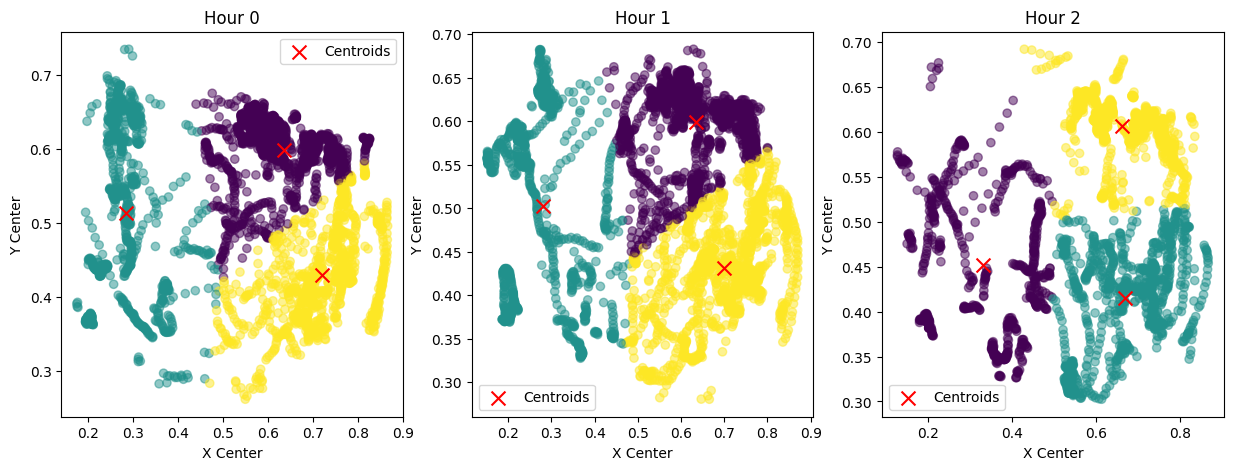

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

def process_fish_positions(df):
    """Convert frame numbers to hour bins (assuming 1 FPS)."""
    df['hour'] = (df['frame'] // 360).astype(int)  # Convert frames to hour bins
    return df

def cluster_positions(df, method='kmeans', k=3, eps=0.05, min_samples=5):
    """Cluster fish positions per hour using K-Means or DBSCAN."""
    clustered_data = []
    for hour, group in df.groupby('hour'):
        positions = group[['x_center', 'y_center']].values

        if method == 'kmeans':
            kmeans = KMeans(n_clusters=min(k, len(positions)), random_state=42, n_init=10)
            labels = kmeans.fit_predict(positions)
            centroids = kmeans.cluster_centers_
        elif method == 'dbscan':
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(positions)
            centroids = np.array([positions[labels == i].mean(axis=0) for i in set(labels) if i != -1])
        else:
            raise ValueError("Invalid clustering method. Choose 'kmeans' or 'dbscan'.")

        clustered_data.append((hour, centroids, labels, positions))

    return clustered_data

def plot_clusters(clustered_data):
    """Visualize clusters per hour."""
    fig, axes = plt.subplots(1, len(clustered_data), figsize=(15, 5))
    for i, (hour, centroids, labels, positions) in enumerate(clustered_data):
        ax = axes[i] if len(clustered_data) > 1 else axes
        ax.scatter(positions[:, 0], positions[:, 1], c=labels, cmap='viridis', alpha=0.5)
        ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        ax.set_title(f'Hour {hour}')
        ax.set_xlabel('X Center')
        ax.set_ylabel('Y Center')
        ax.legend()
    plt.show()

# Example usage
#df = pd.read_csv('fish_positions.csv')
df = process_fish_positions(df)
clustered_data = cluster_positions(df, method='kmeans', k=3)
plot_clusters(clustered_data)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

# Load dataframe (assuming df is already created as per your detection pipeline)
# Convert frame numbers to hour bins (assuming 1 fps after downsampling, adjust if needed)
df['hour'] = (df['frame'] // 360).astype(int)

# Store representative frames per hour
selected_frames = []

# Iterate over each hour
grouped = df.groupby('hour')
for hour, group in grouped:
    positions = group[['x_center', 'y_center']].values

    # Apply DBSCAN clustering
    clustering = DBSCAN(eps=0.05, min_samples=5).fit(positions)  # Adjust eps based on scale
    labels = clustering.labels_

    # Identify the largest cluster (most common fish positions)
    unique_labels, counts = np.unique(labels[labels != -1], return_counts=True)  # Exclude noise (-1)
    if len(unique_labels) == 0:
        continue  # Skip if no clusters found
    dominant_cluster = unique_labels[np.argmax(counts)]

    # Select frames belonging to the dominant cluster
    cluster_mask = labels == dominant_cluster
    cluster_frames = group[cluster_mask]

    # Pick the frame closest to the cluster centroid
    centroid = cluster_frames[['x_center', 'y_center']].mean().values
    closest_frame = cluster_frames.iloc[np.linalg.norm(cluster_frames[['x_center', 'y_center']].values - centroid, axis=1).argmin()]

    selected_frames.append(closest_frame['frame'])

# Output the selected representative frames
print("Selected representative frames per hour:", selected_frames)


Selected representative frames per hour: [135.0, 654.0, 873.0]


### **4. Frame selection:**

In [ ]:
# Export frames from video
video_path = "test1.mp4"  # Change to your video file path
output_dir = "selected_frames/"  # Output directory for frames
os.makedirs(output_dir, exist_ok=True)
import cv2
cap = cv2.VideoCapture(video_path)

for frame_number in selected_frames:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    if ret:
        frame_filename = os.path.join(output_dir, f"frame_{frame_number}.jpg")
        cv2.imwrite(frame_filename, frame)
        print(f"Saved: {frame_filename}")
    else:
        print(f"Failed to extract frame {frame_number}")

cap.release()
print("Frame extraction complete.")

Saved: selected_frames/frame_135.0.jpg
Saved: selected_frames/frame_654.0.jpg
Saved: selected_frames/frame_873.0.jpg
Frame extraction complete.


## **📈 Future Improvements**  
🔹 Implement **YOLO-based region counting** for fish in different thermal zones.  
🔹 Generate **contour plots (time vs. temperature preference)** to visualize behavioral fever kinetics.  